In [1]:
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = imageio.imread("./images/briefs_gray.bmp")

In [3]:
fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create(64, False)

In [8]:
brief.K

0

In [ ]:
keypoints = fast.detect(image, None)
keypoints, descriptors = brief.compute(image, keypoints)
descriptors_binary = np.unpackbits(descriptors, axis=1)

In [ ]:
# OpenCV integral image

In [18]:
temp = np.array([5,2,3,4,1, 1,5,4,2,3, 2,2,1,3,4, 3,5,6,4,5, 4,1,3,2,6], dtype=np.uint8).reshape((5,5))

In [19]:
temp

array([[5, 2, 3, 4, 1],
       [1, 5, 4, 2, 3],
       [2, 2, 1, 3, 4],
       [3, 5, 6, 4, 5],
       [4, 1, 3, 2, 6]], dtype=uint8)

In [20]:
cv2.integral(temp)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  5,  7, 10, 14, 15],
       [ 0,  6, 13, 20, 26, 30],
       [ 0,  8, 17, 25, 34, 42],
       [ 0, 11, 25, 39, 52, 65],
       [ 0, 15, 30, 47, 62, 81]], dtype=int32)

In [22]:
image = imageio.imread("./images/Lenna.bmp")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [23]:
image.shape

(256, 256)

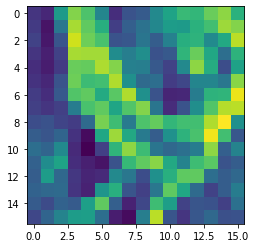

In [65]:
patch = image[190: 190 + 16, 54: 54 + 16]
plt.imshow(patch)
patch = patch / 25.5
patch = patch.astype(np.uint8)

In [66]:
patch

array([[1, 1, 4, 5, 4, 3, 1, 2, 2, 3, 4, 4, 4, 5, 5, 4],
       [2, 1, 3, 5, 5, 4, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5],
       [2, 1, 2, 6, 5, 4, 2, 2, 3, 2, 3, 4, 4, 3, 4, 5],
       [1, 1, 2, 5, 5, 5, 3, 3, 3, 2, 2, 4, 5, 4, 3, 4],
       [1, 1, 2, 5, 5, 5, 5, 3, 3, 2, 2, 3, 5, 4, 2, 4],
       [1, 1, 2, 5, 4, 4, 5, 3, 2, 3, 2, 2, 3, 3, 3, 5],
       [2, 1, 2, 4, 5, 4, 5, 5, 3, 2, 1, 1, 3, 4, 4, 6],
       [2, 1, 2, 3, 4, 5, 4, 4, 5, 3, 1, 2, 3, 4, 5, 5],
       [2, 2, 2, 2, 2, 5, 4, 3, 4, 5, 4, 4, 4, 5, 6, 3],
       [2, 2, 2, 1, 1, 4, 5, 4, 3, 2, 3, 4, 4, 6, 4, 2],
       [3, 2, 3, 1, 1, 2, 4, 5, 4, 3, 2, 3, 3, 5, 2, 3],
       [2, 3, 4, 1, 1, 1, 2, 4, 5, 5, 4, 3, 4, 5, 2, 2],
       [2, 4, 2, 1, 1, 1, 3, 3, 2, 3, 4, 5, 5, 3, 2, 2],
       [2, 2, 2, 1, 1, 3, 4, 2, 2, 3, 5, 4, 2, 2, 2, 3],
       [2, 2, 2, 2, 4, 5, 2, 1, 2, 4, 4, 2, 2, 2, 2, 3],
       [2, 2, 3, 4, 4, 3, 1, 1, 3, 5, 2, 1, 2, 2, 2, 2]], dtype=uint8)

In [67]:
for i in range(16):
    for j in range(16):
        print(patch[i,j], end=' ')
    print()

1 1 4 5 4 3 1 2 2 3 4 4 4 5 5 4 
2 1 3 5 5 4 2 2 3 3 4 4 4 4 5 5 
2 1 2 6 5 4 2 2 3 2 3 4 4 3 4 5 
1 1 2 5 5 5 3 3 3 2 2 4 5 4 3 4 
1 1 2 5 5 5 5 3 3 2 2 3 5 4 2 4 
1 1 2 5 4 4 5 3 2 3 2 2 3 3 3 5 
2 1 2 4 5 4 5 5 3 2 1 1 3 4 4 6 
2 1 2 3 4 5 4 4 5 3 1 2 3 4 5 5 
2 2 2 2 2 5 4 3 4 5 4 4 4 5 6 3 
2 2 2 1 1 4 5 4 3 2 3 4 4 6 4 2 
3 2 3 1 1 2 4 5 4 3 2 3 3 5 2 3 
2 3 4 1 1 1 2 4 5 5 4 3 4 5 2 2 
2 4 2 1 1 1 3 3 2 3 4 5 5 3 2 2 
2 2 2 1 1 3 4 2 2 3 5 4 2 2 2 3 
2 2 2 2 4 5 2 1 2 4 4 2 2 2 2 3 
2 2 3 4 4 3 1 1 3 5 2 1 2 2 2 2 


In [48]:
image_blur = cv2.blur(image,(9,9))

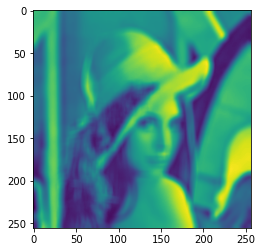

In [49]:
plt.imshow(image_blur)

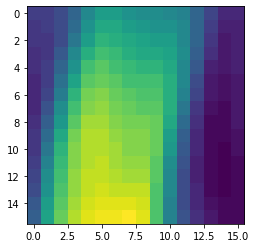

In [58]:
patch_blur = image_blur[55: 55 + 16, 57: 57 + 16]
plt.imshow(patch_blur)
patch_blur = patch_blur / 25.5
patch_blur = patch_blur.astype(np.uint8)

In [59]:
patch_blur

array([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
       [4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
       [4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
       [4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
       [4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
       [4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4],
       [4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4],
       [4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4],
       [4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4],
       [4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4],
       [4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4],
       [4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4]], dtype=uint8)

In [61]:
for i in range(16):
    for j in range(16):
        print(patch_blur[i,j], end=' ')
    print()

4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
4 4 4 4 4 5 5 4 4 4 4 4 4 4 4 4 
4 4 4 4 4 5 5 5 5 4 4 4 4 4 4 4 
4 4 4 4 5 5 5 5 5 5 5 4 4 4 4 4 
4 4 4 4 5 5 5 5 5 5 5 4 4 4 4 4 
4 4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 
4 4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 
4 4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 
4 4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 
4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 4 
4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 4 
4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 4 
4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 4 
4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 4 
4 4 5 5 5 5 5 5 5 5 4 4 4 4 4 4 
4 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 


In [9]:
import imageio
import cv2
import numpy as np

In [7]:
image = imageio.imread("./images/briefs_gray.bmp")
fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create(64, False)  # size of descr in bytes (default 32); whether to use orientation (default False (I think))

In [10]:
keypoints = fast.detect(image, None)
keypoints, descriptors = brief.compute(image, keypoints)
descriptors_binary = np.unpackbits(descriptors, axis=1)

In [22]:
print("Note to self: only keypoint coordinates and response seems to be changing")

for keypoint in keypoints:
    print(keypoint.angle)
    print(keypoint.class_id)
    print(keypoint.octave)
    print(keypoint.pt)
    print(keypoint.response)
    print(keypoint.size)
    print()

Note to self: only keypoint coordinates and response seems to be changing
-1.0
-1
0
(60.0, 40.0)
13.0
7.0

-1.0
-1
0
(57.0, 42.0)
11.0
7.0

-1.0
-1
0
(442.0, 42.0)
14.0
7.0

-1.0
-1
0
(70.0, 48.0)
15.0
7.0

-1.0
-1
0
(433.0, 48.0)
198.0
7.0

-1.0
-1
0
(58.0, 49.0)
11.0
7.0

-1.0
-1
0
(355.0, 49.0)
10.0
7.0

-1.0
-1
0
(357.0, 49.0)
15.0
7.0

-1.0
-1
0
(417.0, 49.0)
12.0
7.0

-1.0
-1
0
(426.0, 49.0)
19.0
7.0

-1.0
-1
0
(62.0, 50.0)
11.0
7.0

-1.0
-1
0
(64.0, 50.0)
12.0
7.0

-1.0
-1
0
(70.0, 50.0)
10.0
7.0

-1.0
-1
0
(72.0, 50.0)
10.0
7.0

-1.0
-1
0
(420.0, 50.0)
222.0
7.0

-1.0
-1
0
(429.0, 50.0)
128.0
7.0

-1.0
-1
0
(437.0, 50.0)
102.0
7.0

-1.0
-1
0
(78.0, 51.0)
10.0
7.0

-1.0
-1
0
(412.0, 51.0)
193.0
7.0

-1.0
-1
0
(414.0, 51.0)
199.0
7.0

-1.0
-1
0
(433.0, 51.0)
74.0
7.0

-1.0
-1
0
(72.0, 52.0)
14.0
7.0

-1.0
-1
0
(408.0, 52.0)
15.0
7.0

-1.0
-1
0
(428.0, 52.0)
70.0
7.0

-1.0
-1
0
(56.0, 53.0)
228.0
7.0

-1.0
-1
0
(62.0, 53.0)
13.0
7.0

-1.0
-1
0
(64.0, 53.0)
22.0
7.0

-1.0
-1
0
(110

-1
0
(164.0, 127.0)
199.0
7.0

-1.0
-1
0
(169.0, 127.0)
23.0
7.0

-1.0
-1
0
(171.0, 127.0)
45.0
7.0

-1.0
-1
0
(183.0, 127.0)
37.0
7.0

-1.0
-1
0
(283.0, 127.0)
21.0
7.0

-1.0
-1
0
(288.0, 127.0)
159.0
7.0

-1.0
-1
0
(294.0, 127.0)
196.0
7.0

-1.0
-1
0
(296.0, 127.0)
213.0
7.0

-1.0
-1
0
(387.0, 127.0)
10.0
7.0

-1.0
-1
0
(167.0, 128.0)
43.0
7.0

-1.0
-1
0
(189.0, 128.0)
11.0
7.0

-1.0
-1
0
(198.0, 128.0)
89.0
7.0

-1.0
-1
0
(203.0, 128.0)
44.0
7.0

-1.0
-1
0
(257.0, 128.0)
41.0
7.0

-1.0
-1
0
(259.0, 128.0)
10.0
7.0

-1.0
-1
0
(262.0, 128.0)
16.0
7.0

-1.0
-1
0
(278.0, 128.0)
209.0
7.0

-1.0
-1
0
(305.0, 128.0)
118.0
7.0

-1.0
-1
0
(53.0, 129.0)
61.0
7.0

-1.0
-1
0
(159.0, 129.0)
14.0
7.0

-1.0
-1
0
(173.0, 129.0)
170.0
7.0

-1.0
-1
0
(182.0, 129.0)
76.0
7.0

-1.0
-1
0
(185.0, 129.0)
25.0
7.0

-1.0
-1
0
(229.0, 129.0)
170.0
7.0

-1.0
-1
0
(251.0, 129.0)
12.0
7.0

-1.0
-1
0
(253.0, 129.0)
11.0
7.0

-1.0
-1
0
(312.0, 129.0)
222.0
7.0

-1.0
-1
0
(317.0, 129.0)
212.0
7.0

-1.0
-1
0
(445.0

(76.0, 164.0)
11.0
7.0

-1.0
-1
0
(82.0, 164.0)
11.0
7.0

-1.0
-1
0
(94.0, 164.0)
10.0
7.0

-1.0
-1
0
(100.0, 164.0)
22.0
7.0

-1.0
-1
0
(107.0, 164.0)
30.0
7.0

-1.0
-1
0
(112.0, 164.0)
14.0
7.0

-1.0
-1
0
(157.0, 164.0)
11.0
7.0

-1.0
-1
0
(165.0, 164.0)
19.0
7.0

-1.0
-1
0
(188.0, 164.0)
19.0
7.0

-1.0
-1
0
(193.0, 164.0)
14.0
7.0

-1.0
-1
0
(198.0, 164.0)
11.0
7.0

-1.0
-1
0
(210.0, 164.0)
16.0
7.0

-1.0
-1
0
(236.0, 164.0)
22.0
7.0

-1.0
-1
0
(238.0, 164.0)
21.0
7.0

-1.0
-1
0
(250.0, 164.0)
21.0
7.0

-1.0
-1
0
(260.0, 164.0)
11.0
7.0

-1.0
-1
0
(279.0, 164.0)
12.0
7.0

-1.0
-1
0
(304.0, 164.0)
15.0
7.0

-1.0
-1
0
(316.0, 164.0)
24.0
7.0

-1.0
-1
0
(320.0, 164.0)
11.0
7.0

-1.0
-1
0
(434.0, 164.0)
11.0
7.0

-1.0
-1
0
(436.0, 164.0)
13.0
7.0

-1.0
-1
0
(52.0, 165.0)
48.0
7.0

-1.0
-1
0
(88.0, 165.0)
11.0
7.0

-1.0
-1
0
(119.0, 165.0)
18.0
7.0

-1.0
-1
0
(122.0, 165.0)
30.0
7.0

-1.0
-1
0
(132.0, 165.0)
24.0
7.0

-1.0
-1
0
(134.0, 165.0)
10.0
7.0

-1.0
-1
0
(162.0, 165.0)
13.0
7.0



7.0

-1.0
-1
0
(466.0, 243.0)
19.0
7.0

-1.0
-1
0
(452.0, 244.0)
18.0
7.0

-1.0
-1
0
(459.0, 244.0)
21.0
7.0

-1.0
-1
0
(461.0, 244.0)
25.0
7.0

-1.0
-1
0
(38.0, 245.0)
14.0
7.0

-1.0
-1
0
(42.0, 245.0)
22.0
7.0

-1.0
-1
0
(454.0, 245.0)
12.0
7.0

-1.0
-1
0
(304.0, 246.0)
11.0
7.0

-1.0
-1
0
(448.0, 246.0)
15.0
7.0

-1.0
-1
0
(39.0, 247.0)
20.0
7.0

-1.0
-1
0
(446.0, 247.0)
38.0
7.0

-1.0
-1
0
(42.0, 248.0)
34.0
7.0

-1.0
-1
0
(454.0, 248.0)
22.0
7.0

-1.0
-1
0
(465.0, 248.0)
20.0
7.0

-1.0
-1
0
(452.0, 249.0)
36.0
7.0

-1.0
-1
0
(460.0, 250.0)
24.0
7.0

-1.0
-1
0
(38.0, 251.0)
14.0
7.0

-1.0
-1
0
(446.0, 251.0)
32.0
7.0

-1.0
-1
0
(454.0, 251.0)
50.0
7.0

-1.0
-1
0
(467.0, 251.0)
18.0
7.0

-1.0
-1
0
(449.0, 252.0)
20.0
7.0

-1.0
-1
0
(452.0, 252.0)
15.0
7.0

-1.0
-1
0
(462.0, 252.0)
25.0
7.0

-1.0
-1
0
(309.0, 253.0)
10.0
7.0

-1.0
-1
0
(305.0, 254.0)
18.0
7.0

-1.0
-1
0
(454.0, 254.0)
50.0
7.0

-1.0
-1
0
(38.0, 255.0)
35.0
7.0

-1.0
-1
0
(40.0, 255.0)
53.0
7.0

-1.0
-1
0
(309.0, 255.

-1
0
(281.0, 575.0)
16.0
7.0

-1.0
-1
0
(188.0, 576.0)
19.0
7.0

-1.0
-1
0
(196.0, 576.0)
13.0
7.0

-1.0
-1
0
(202.0, 576.0)
136.0
7.0

-1.0
-1
0
(194.0, 577.0)
14.0
7.0

-1.0
-1
0
(200.0, 577.0)
170.0
7.0

-1.0
-1
0
(205.0, 577.0)
19.0
7.0

-1.0
-1
0
(203.0, 578.0)
24.0
7.0

-1.0
-1
0
(192.0, 579.0)
11.0
7.0

-1.0
-1
0
(203.0, 580.0)
14.0
7.0

-1.0
-1
0
(201.0, 581.0)
13.0
7.0



In [33]:
keypoint_custom1 = cv2.KeyPoint(60.0, 40.0, _size=7.0, _angle=-1, _response=13.0)
keypoint_custom2 = cv2.KeyPoint(60.0, 40.0, _size=7.0, _angle=-1, _response=0.0)

In [34]:
keypoints_custom = []
keypoints_custom.append(keypoint_custom1)
keypoints_custom.append(keypoint_custom2)

In [35]:
keypoints_custom, descriptors_custom = brief.compute(image, keypoints_custom)

In [36]:
descriptors_custom

array([[ 25,   7,  40, 238,  45,  43, 161, 221,  18,  82,  90,  40, 122,
        141, 134, 140, 230, 248, 122, 129, 216, 152, 219,  32, 248, 220,
        101, 123, 248,  95, 204, 111, 146,  57, 177, 122, 246, 139,  36,
        141, 184,   2, 184, 251,  13, 150,  94,  73,  21,   7, 162,  14,
          1, 190, 145,  94,   2, 139, 187,  23, 236,  85, 239, 129],
       [ 25,   7,  40, 238,  45,  43, 161, 221,  18,  82,  90,  40, 122,
        141, 134, 140, 230, 248, 122, 129, 216, 152, 219,  32, 248, 220,
        101, 123, 248,  95, 204, 111, 146,  57, 177, 122, 246, 139,  36,
        141, 184,   2, 184, 251,  13, 150,  94,  73,  21,   7, 162,  14,
          1, 190, 145,  94,   2, 139, 187,  23, 236,  85, 239, 129]],
      dtype=uint8)

In [37]:
print("Note to self: response doesn't seem to matter!")

Note to self: response doesn't seem to matter!


In [40]:
patch_size = 48

keypoint_custom1 = cv2.KeyPoint(68.0 + patch_size // 2, 96.0 + patch_size // 2, _size=7.0, _angle=-1)
keypoint_custom2 = cv2.KeyPoint(68.0 + patch_size // 2 + 1, 96.0 + patch_size // 2 + 1, _size=7.0, _angle=-1)

In [43]:
keypoints_custom = []
keypoints_custom.append(keypoint_custom1)
keypoints_custom.append(keypoint_custom2)
keypoints_custom, descriptors_custom = brief.compute(image, keypoints_custom)
descriptors_binary_custom = np.unpackbits(descriptors_custom, axis=1)

In [42]:
descriptors_custom

array([[240, 180,  46, 201,  92, 114, 220,  19, 157, 253, 160,  82, 216,
        115,  94, 245, 105, 119, 144, 151,  51, 223, 221, 252,  22,  64,
        216,  42, 194, 226,  88, 207,  97, 243, 210, 251, 255, 228,   7,
        114, 202, 111,  65,  43,  85,  10, 111, 233,  60, 204, 174, 203,
        232, 107, 166,  62, 200, 219,  35,  40,  89,  39,  33, 252],
       [176, 180,  46, 201,  92, 114, 220,  19, 156, 253, 161,  82, 216,
        115,  95, 245, 109, 117, 148, 135,  49, 207, 217, 253,  22,  72,
        208,  57, 194, 226,  88,  71,  96, 243,  82, 249, 251, 228,   7,
         83, 200, 111,  65, 107,  85,  10, 111, 185, 188, 204, 175, 194,
        232, 107, 182,  62, 200, 211,  39,  40, 121,  39,  33, 252]],
      dtype=uint8)

In [45]:
descriptors_binary_custom[0]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [47]:
descriptors_binary_custom[1]

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [48]:
descriptors_binary_custom[1] - descriptors_binary_custom[0]

array([  0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0, 255,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   

In [17]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from skimage.measure import block_reduce

In [13]:
patch = imageio.imread('/scratch/image_datasets/2_for_learned_brief/ridiculously_small/test/class0/patch_brief_00054.bmp')
patch = patch[5: 53, 5: 53]

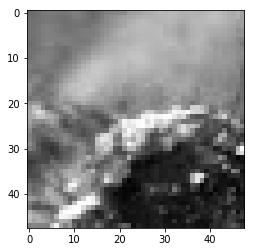

In [23]:
plt.imshow(patch, cmap='gray')

In [38]:
# patch_downsampled = scipy.misc.imresize(patch, (12, 12))
patch_downsampled = block_reduce(patch, (8, 8), func=np.mean)

(6, 6)


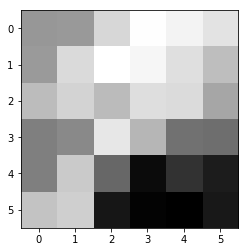

In [39]:
plt.imshow(patch_downsampled, cmap='gray')
print(patch_downsampled.shape)

In [1]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Flatten, Dense, Reshape
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import backend as K
from keras import initializers
import keras

import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os import system
import os
import random

import imageio

from skimage.measure import block_reduce

Using TensorFlow backend.


In [4]:
base_dir = '/scratch/image_datasets/2_for_learned_brief/klpds'
model_version = '0.0.2.2.0_whole128_dense1152_conv32_conv32_up_conv32_conv32_up_conv32_conv8_conv1__relu_last_sigmoid_bce_output24X24_klpds'
input_patch_size = 56

In [3]:
brief_ae = load_model(base_dir + '/brief_ae_' + model_version + '.h5')

In [6]:
input_shape = (input_patch_size, input_patch_size, 1)
input_img = Input(shape=input_shape)

x = Conv2D(1, (3,3), activation="relu", padding="valid")(input_img)
x = Conv2D(1, (3, 3), activation="relu", padding="valid")(x)
x = Conv2D(1, (3, 3), activation="relu", padding="valid")(x)
average_blurred = Conv2D(1, (3, 3), activation="relu", padding="valid")(x)
flattened = Flatten(data_format="channels_last")(average_blurred)
briefed = Dense(512, activation="sigmoid")(flattened)

brief_encoder = Model(input_img, briefed)

In [7]:
for i in range(len(brief_encoder.layers)):
    brief_encoder.get_layer(index=i).set_weights(brief_ae.get_layer(index=i).get_weights())

In [88]:
patch1 = imageio.imread('/scratch/temp/patch_klupa_000022.bmp')
patch2 = imageio.imread('/scratch/temp/patch_klupa_000022_shifted.bmp')
patch3 = imageio.imread('/scratch/temp/patch_klupa_000022_rotated.bmp')
patch4 = imageio.imread('/scratch/temp/patch_klupa_000022_noise3.bmp')

patch_uljez = imageio.imread('/scratch/temp/patch_klupa_000023.bmp')

In [89]:
patch1 = np.expand_dims(patch1, axis=-1)
patch2 = np.expand_dims(patch2, axis=-1)
patch3 = np.expand_dims(patch3, axis=-1)
patch4 = np.expand_dims(patch4, axis=-1)

patch_uljez = np.expand_dims(patch_uljez, axis=-1)

patches = np.array([patch1, patch2, patch3, patch4, patch_uljez])

In [90]:
patches.shape

(5, 56, 56, 1)

In [91]:
descrs = brief_encoder.predict(patches)
descrs = descrs.round().astype(int)

In [92]:
np.count_nonzero(descrs[0] - descrs[3])

14

In [93]:
np.count_nonzero(descrs[0] - descrs[1])

50